In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nhl_df = pd.read_csv("nhlstats.csv")

In [24]:
ufa_df = nhl_df.loc[nhl_df["Status"] == "UFA"]

In [25]:
ufa_df = ufa_df.dropna()
ufa_df.head()

,Player Id,Age,Nationality,Over All Draft,Last Name,First Name,Position,Team,GP,Goals,Assists,Points,PlusMinus,PIM,GWG,Status,Salary
1,8471716,30,USA,42.0,Abdelkader,Justin,LW/RW,DET,64,7,14,21,-20,50,1,UFA,5500000.0
4,8475844,25,USA,140.0,Agostino,Kenny,LW,STL,7,1,2,3,0,2,0,UFA,625000.0
6,8473991,29,CAN,5.0,Alzner,Karl,D,WSH,82,3,10,13,23,28,0,UFA,2800000.0
11,8473573,29,RUS,54.0,Anisimov,Artem,C/LW,CHI,64,22,23,45,9,30,7,UFA,5750000.0
16,8474715,28,USA,157.0,Atkinson,Cam,RW,CBJ,82,35,27,62,13,22,9,UFA,3500000.0


In [26]:
ufa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 1 to 882
Data columns (total 17 columns):
Player Id         399 non-null int64
Age               399 non-null int64
Nationality       399 non-null object
Over All Draft    399 non-null float64
Last Name         399 non-null object
First Name        399 non-null object
Position          399 non-null object
Team              399 non-null object
GP                399 non-null int64
Goals             399 non-null int64
Assists           399 non-null int64
Points            399 non-null int64
PlusMinus         399 non-null int64
PIM               399 non-null int64
GWG               399 non-null int64
Status            399 non-null object
Salary            399 non-null float64
dtypes: float64(2), int64(9), object(6)
memory usage: 56.1+ KB


In [27]:
#### Salary vs. Birthplace ####
ufa_df["Nationality"].value_counts()
oth_df = ufa_df
oth_df = oth_df.replace(['DNK','DEU','FRA','AUT','NOR','SVN','HRV','GBR','LVA'],['OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH','OTH'])

In [28]:
can = ufa_df.loc[ufa_df["Nationality"] ==  'CAN']
usa = ufa_df.loc[ufa_df["Nationality"] ==  'USA']
swe = ufa_df.loc[ufa_df["Nationality"] ==  'SWE']
rus = ufa_df.loc[ufa_df["Nationality"] ==  'RUS']
fin = ufa_df.loc[ufa_df["Nationality"] ==  'FIN']
cze = ufa_df.loc[ufa_df["Nationality"] ==  'CZE']
che = ufa_df.loc[ufa_df["Nationality"] ==  'CHE']
svk = ufa_df.loc[ufa_df["Nationality"] ==  'SVK']
oth = oth_df.loc[oth_df["Nationality"] ==  'OTH']

In [29]:
can_sal = round(can['Salary'].mean())
usa_sal = round(usa['Salary'].mean())
swe_sal = round(swe['Salary'].mean())
rus_sal = round(rus['Salary'].mean())
fin_sal = round(fin['Salary'].mean())
cze_sal = round(cze['Salary'].mean())
che_sal = round(che['Salary'].mean())
svk_sal = round(svk['Salary'].mean())
oth_sal = round(oth['Salary'].mean())

In [30]:
countries_sal = [can_sal, usa_sal, swe_sal, rus_sal, fin_sal,cze_sal,che_sal,svk_sal,oth_sal]

In [31]:
x_axis = np.arange(len(countries_sal))

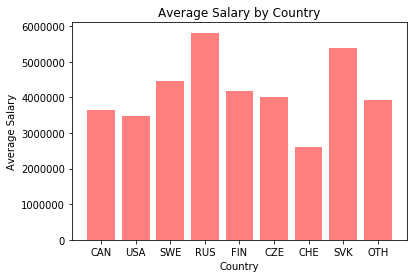

In [32]:
plt.bar(x_axis, countries_sal, color='r', alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["CAN", "USA", "SWE", "RUS", "FIN","CZE","CHE","SVK","OTH"])
plt.title("Average Salary by Country")
plt.xlabel("Country")
plt.ylabel("Average Salary")
plt.show()

In [ ]:
#draft_plot = plt.scatter(x = ufa_df['ride_count'], y = urban['fare'], s = urban['driver_count'] * 5, alpha = 0.75,
#                        edgecolors = 'black', color = 'lightcoral', label = 'Urban')